In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import roc_auc_score, confusion_matrix, accuracy_score

from pylab import rcParams
rcParams['figure.figsize'] = 8, 8

In [2]:
data = pd.read_csv("creditcard.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# Checking the shape of our data
data.shape

(284807, 31)

In [5]:
# Checking the distribution of two classes in the target variable
data.Class.value_counts()

0    284315
1       492
Name: Class, dtype: int64

In [6]:
# Creating the dataset with all independent variables
X = data.iloc[:,:-1]

# Creating the dataset with the dependent variable
Y = data.iloc[:,-1]

In [7]:
# Splitting the dataset into the Training set and Test set
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.2, random_state = 0, stratify = Y)

In [8]:
print("The shape of train dataset :")
print(X_train.shape)

print("\n The shape of test dataset :")
print(X_test.shape)

The shape of train dataset :
(227845, 30)

 The shape of test dataset :
(56962, 30)


In [9]:
print("Distribution of classes of dependent variable in train :")
print(Y_train.value_counts())

print("\n Distribution of classes of dependent variable in test :")
print(Y_test.value_counts())

Distribution of classes of dependent variable in train :
0    227451
1       394
Name: Class, dtype: int64

 Distribution of classes of dependent variable in test :
0    56864
1       98
Name: Class, dtype: int64


In [10]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


ERROR: Exception:
Traceback (most recent call last):
  File "C:\Users\Shubham\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 106, in _run_wrapper
    status = _inner_run()
  File "C:\Users\Shubham\anaconda3\lib\site-packages\pip\_internal\cli\base_command.py", line 97, in _inner_run
    return self.run(options, args)
  File "C:\Users\Shubham\anaconda3\lib\site-packages\pip\_internal\cli\req_command.py", line 67, in wrapper
    return func(self, options, args)
  File "C:\Users\Shubham\anaconda3\lib\site-packages\pip\_internal\commands\install.py", line 484, in run
    installed_versions[distribution.canonical_name] = distribution.version
  File "C:\Users\Shubham\anaconda3\lib\site-packages\pip\_internal\metadata\pkg_resources.py", line 192, in version
    return parse_version(self._dist.version)
  File "C:\Users\Shubham\anaconda3\lib\site-packages\pip\_vendor\packaging\version.py", line 56, in parse
    return Version(version)
  File "C:\Users\Shubham\anaconda3\lib

In [11]:
#import lightgbm and xgboost 
# import lightgbm as lgb 
import xgboost as xgb

In [12]:
#The data is stored in a DMatrix object 
#label is used to define our outcome variable
#The data is stored in a DMatrix object Data Matrix used in XGBoost. DMatrix is an internal data structure that is used by XGBoost, which is optimized for both memory efficiency and training speed. You can construct DMatrix from multiple different sources of data.
#
dtrain=xgb.DMatrix(X_train,label=Y_train)
dtest=xgb.DMatrix(X_test)

In [13]:
#setting parameters for xgboost
parameters={'max_depth':7, 'eta':1, 'silent':1,'objective':'binary:logistic','eval_metric':'auc','learning_rate':.05}

In [14]:
#training our model 
num_round=50
from datetime import datetime 
start = datetime.now() 
xg=xgb.train(parameters,dtrain,num_round) 
stop = datetime.now()

C:\Users\Shubham\anaconda3\lib\site-packages\xgboost\core.py:158: UserWarning: [22:40:34] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "silent" } are not used.

  warnings.warn(smsg, UserWarning)


In [15]:
#now predicting our model on train set 
train_class_preds_probs=xg.predict(dtrain) 
#now predicting our model on test set 
test_class_preds_probs =xg.predict(dtest)

In [16]:
#length of pred prob
len(train_class_preds_probs)

227845

In [17]:
#evaluation from thresold value
train_class_preds = []
test_class_preds = []
for i in range(0,len(train_class_preds_probs)):
  if train_class_preds_probs[i] >= 0.5:
    train_class_preds.append(1)
  else:
    train_class_preds.append(0)

for i in range(0,len(test_class_preds_probs)):
  if test_class_preds_probs[i] >= 0.5:
    test_class_preds.append(1)
  else:
    test_class_preds.append(0)

In [18]:
#print the array of pred prob
test_class_preds_probs[:20]

array([0.00995724, 0.00995724, 0.00995724, 0.00995724, 0.00995724,
       0.00995724, 0.01013789, 0.00995724, 0.00995724, 0.00995724,
       0.00995724, 0.00995724, 0.00995724, 0.00995724, 0.00995724,
       0.00995724, 0.00995724, 0.00995724, 0.00995724, 0.00995724],
      dtype=float32)

In [19]:
#length of y train
len(Y_train)

227845

In [20]:
#lenght of train class pred
len(train_class_preds)

227845

In [21]:
# Get the accuracy scores
train_accuracy_xgb = accuracy_score(train_class_preds,Y_train)
test_accuracy_xgb = accuracy_score(test_class_preds,Y_test)

print("The accuracy on train data is ", train_accuracy_xgb)
print("The accuracy on test data is ", test_accuracy_xgb)

The accuracy on train data is  0.9997147183392219
The accuracy on test data is  0.999385555282469


In [22]:
#model evaluation before gdcv
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score, classification_report, confusion_matrix
test_accuracy_xgb = accuracy_score(test_class_preds,Y_test)
test_precision_xgb = precision_score(test_class_preds,Y_test)
test_recall_score_xgb = recall_score(test_class_preds,Y_test)
test_f1_score_xgb = f1_score(test_class_preds,Y_test)
test_roc_score_xgb = roc_auc_score(test_class_preds,Y_test)

print("The accuracy on test data is ", test_accuracy_xgb)
print("The precision on test data is ", test_precision_xgb)
print("The recall on test data is ", test_recall_score_xgb)
print("The f1 on test data is ", test_f1_score_xgb)
print("The roc_score on train data is ", test_roc_score_xgb)

The accuracy on test data is  0.999385555282469
The precision on test data is  0.7142857142857143
The recall on test data is  0.9090909090909091
The f1 on test data is  0.8
The roc_score on train data is  0.9542993439714896


In [23]:
#grid search cv for xgboost
from xgboost import XGBClassifier
param_test1 = {
 'max_depth':range(3,10,2),
 'min_child_weight':range(1,6,2)
}
gsearch1 = GridSearchCV(estimator = XGBClassifier( learning_rate =0.1, n_estimators=140, max_depth=5,
 min_child_weight=1, gamma=0, subsample=0.8, colsample_bytree=0.8,
 objective= 'binary:logistic', nthread=4, scale_pos_weight=1, seed=27), 
 param_grid = param_test1, scoring='accuracy',n_jobs=-1, cv=3, verbose = 2)
gsearch1.fit(X_train, Y_train)

Fitting 3 folds for each of 12 candidates, totalling 36 fits


GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=0.8, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=0,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=0.1, max_b...e,
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=5,
                                     max_leaves=None, min_child_weight=1,
                                     missing=nan, monotone_constraints=None,
                                     multi_strategy=None, n_estimators=140,
                                     n_jobs=None, nthread=4,
                                     num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'max_depth': range(3, 10, 2),
                         'min_child_weight': range(1, 6, 2)},
             scoring='accuracy', verbose=2)

In [24]:
#gdcv score after training model on the data set
gsearch1.best_score_

0.9995918276620634

In [25]:
#optimal xgb
optimal_xgb = gsearch1.best_estimator_

In [26]:
# Get the predicted classes
train_class_preds = optimal_xgb.predict(X_train)
test_class_preds = optimal_xgb.predict(X_test)

In [27]:
# Get the accuracy scores
train_accuracy_xgb_tuned = accuracy_score(train_class_preds,Y_train)
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,Y_test)

print("The accuracy on train data is ", train_accuracy_xgb_tuned)
print("The accuracy on test data is ", test_accuracy_xgb_tuned)

The accuracy on train data is  0.9999209989247075
The accuracy on test data is  0.9994557775359011


In [28]:
#model score for xgboost
test_accuracy_xgb_tuned = accuracy_score(test_class_preds,Y_test)
test_precision_xgb_tuned = precision_score(test_class_preds,Y_test)
test_recall_score_xgb_tuned = recall_score(test_class_preds,Y_test)
test_f1_score_xgb_tuned = f1_score(test_class_preds,Y_test)
test_roc_score_xgb_tuned = roc_auc_score(test_class_preds,Y_test)

print("The accuracy on test data is ", test_accuracy_xgb_tuned)
print("The precision on test data is ", test_precision_xgb_tuned)
print("The recall on test data is ", test_recall_score_xgb_tuned)
print("The f1 on test data is ", test_f1_score_xgb_tuned)
print("The roc_score on test data is ", test_roc_score_xgb_tuned)

The accuracy on test data is  0.9994557775359011
The precision on test data is  0.7448979591836735
The recall on test data is  0.9240506329113924
The f1 on test data is  0.8248587570621468
The roc_score on test data is  0.961805567145709


In [29]:
#important features respect to Xgb
pd.DataFrame(optimal_xgb.feature_importances_,
                                
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]

,importance_xgb
14,0.301807
10,0.166142
17,0.047576
12,0.043357
7,0.038149
16,0.031446
4,0.026555
1,0.020994
8,0.020174
0,0.019852


In [30]:
# Feature Importance
feature_importances_xgb = pd.DataFrame(optimal_xgb.feature_importances_,
                                    columns=['importance_xgb']).sort_values('importance_xgb',
                                                                        ascending=False)[:10]

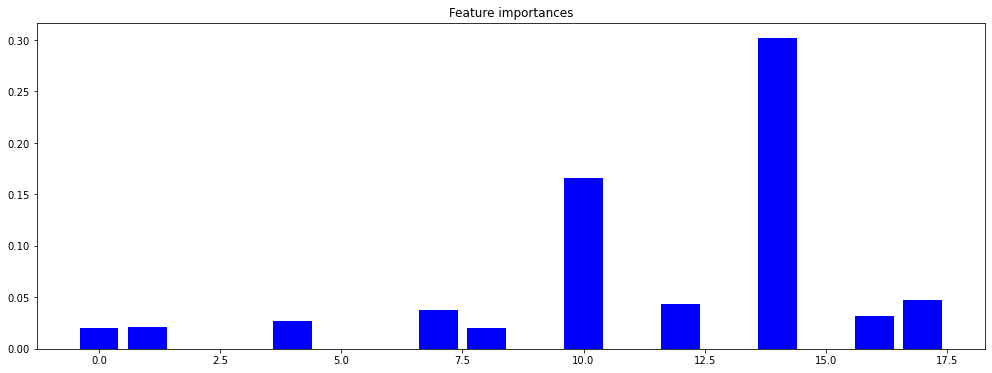

In [31]:
#plot for the important feature selection by xgb
plt.subplots(figsize=(17,6))
plt.title("Feature importances")
plt.bar(feature_importances_xgb.index, feature_importances_xgb['importance_xgb'],
        color="b",  align="center")
plt.show()

In [32]:
#y pred after training the model by gdcv
y_preds_proba_xgb = optimal_xgb.predict_proba(X_test)[::,1]

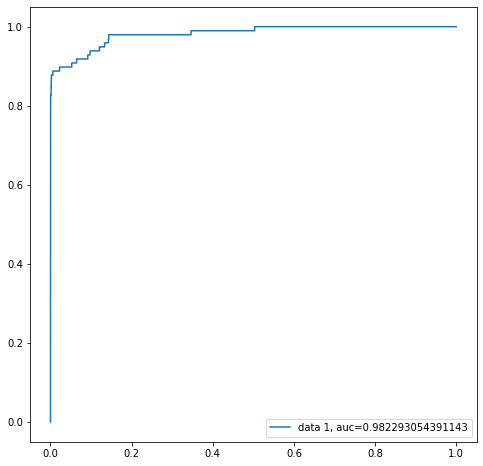

In [33]:
#plot for the auc-roc for xgb
import sklearn.metrics as metrics
y_pred_proba = y_preds_proba_xgb
fpr, tpr, _ = metrics.roc_curve(Y_test,  y_pred_proba)
auc = metrics.roc_auc_score(Y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()